<a href="https://colab.research.google.com/github/Harsha080996/ML-assignments/blob/master/HW1problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from keras.datasets import mnist
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
import math
#Loading the MNIST data and classifying data into test and train set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
temp = Y_test
input_dim = 784
output_dim = 10
total_classes = 10
batch_size = 8
num_exp = 50
learning_rate=0.005
new_array = []
#Now we need to train and test the model first and then we need to reshape it
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#one hot encoding needs to be done to make sure we have 1 for the digit and rest should be 0's in the vector
Y_train = np_utils.to_categorical(Y_train, total_classes)
Y_test = np_utils.to_categorical(Y_test, total_classes)



Using TensorFlow backend.


In [0]:
#Sigmoid function "a = f(z)" is defined which acts as activation function
def sigmoid_function(input): 
  z = 1/(1+np.exp(-input))
  return z

In [0]:
#We need to use above activation function and declare the f(z) value, where z = Wx+b
def main_function(Weights,bias,input):
  result = 1/(1+np.exp(-(np.dot(Weights,np.transpose(input)) + (bias))))
  return result

In [0]:
#We need to use mean sqaured error loss functin formula as we need to perform logistic regression using mse
def mse(Y_train,result,batch_size):
  loss = np.sum(np.multiply((np.transpose(Y_train) - result),(np.transpose(Y_train) - result))/2,axis=1,keepdims=True)/batch_size
  return loss

In [5]:
def functions(X_train,Y_train,result,Weights,bias,learning_rate,batch_size):# I defined all the derivates of loss, sigmoid functions ,Weights, bias, Z value below which are the predefined formulas
  
  diff_loss = result - np.transpose(Y_train)  
  diff_sigmoid = sigmoid_function(result)*(1 - sigmoid_function(result))
  diff_zvalue = np.multiply(diff_loss,diff_sigmoid)
  diff_Weights = np.dot(diff_zvalue,X_train)
  diff_bias = np.sum(diff_zvalue,axis=1,keepdims=True)
  Weights -= learning_rate*diff_Weights
  bias -= learning_rate*diff_bias
  return Weights,bias
Weights = np.random.randn(10,784)*0.01# values of weights and bias are defined.
bias = np.random.randn(10,1)*0.01
for i in range(num_exp):#Training the model by using logistric regression with mse
  for j in range(0, X_train.shape[0], batch_size):
    result = main_function(Weights,bias,X_train[j:j+batch_size])
    Weights,bias = functions(X_train[j:j+batch_size],Y_train[j:j+batch_size],result,Weights,bias,learning_rate,batch_size)
  final = np.transpose(main_function(Weights,bias,X_test))
  new_list = list()
  for k in range(10000): new_list.append(np.argmax(final[k]))
  a = 0
  for l in range(10000):
    if new_list[l]  == temp[l]:a += 1 #calculating the accuracy of the model
  print('Epoch_value : ', i+1)#printing the epoch values
  print('accuracy : ',a*0.01)#printing accuracy for each epoch value
  new_array.append(a*0.01)

Epoch_value :  1
accuracy :  89.42
Epoch_value :  2
accuracy :  90.45
Epoch_value :  3
accuracy :  90.74
Epoch_value :  4
accuracy :  91.04
Epoch_value :  5
accuracy :  91.14
Epoch_value :  6
accuracy :  91.24
Epoch_value :  7
accuracy :  91.31
Epoch_value :  8
accuracy :  91.42
Epoch_value :  9
accuracy :  91.45
Epoch_value :  10
accuracy :  91.49
Epoch_value :  11
accuracy :  91.57000000000001
Epoch_value :  12
accuracy :  91.60000000000001
Epoch_value :  13
accuracy :  91.58
Epoch_value :  14
accuracy :  91.56
Epoch_value :  15
accuracy :  91.57000000000001
Epoch_value :  16
accuracy :  91.58
Epoch_value :  17
accuracy :  91.59
Epoch_value :  18
accuracy :  91.57000000000001
Epoch_value :  19
accuracy :  91.59
Epoch_value :  20
accuracy :  91.62
Epoch_value :  21
accuracy :  91.64
Epoch_value :  22
accuracy :  91.64
Epoch_value :  23
accuracy :  91.65
Epoch_value :  24
accuracy :  91.65
Epoch_value :  25
accuracy :  91.65
Epoch_value :  26
accuracy :  91.65
Epoch_value :  27
accurac

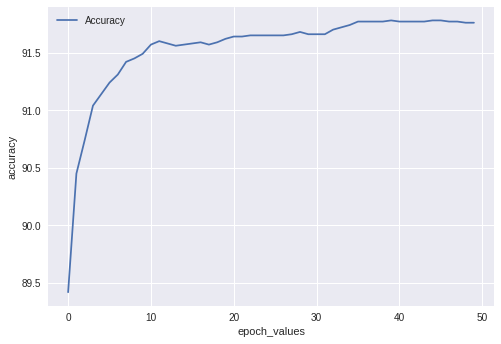

In [6]:
#plotting the accuracy for the above code
plt.plot(new_array, label="Accuracy")
plt.xlabel('epoch_values')
plt.ylabel('accuracy')
plt.legend()